#  Ejemplos de matplotlib 

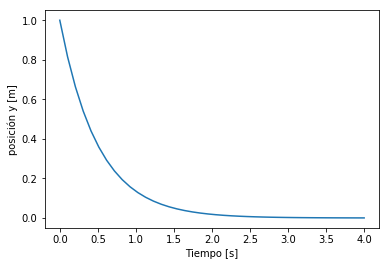

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def calc_derivada(ypos, tiempo):
    return -2*ypos

vec_tiempo = np.linspace(0, 4, 40)
yvec = odeint(calc_derivada, 1, vec_tiempo) # integra un sistema de ODE's

plt.plot(vec_tiempo, yvec)
plt.xlabel('Tiempo [s]')
plt.ylabel('posición y [m]')

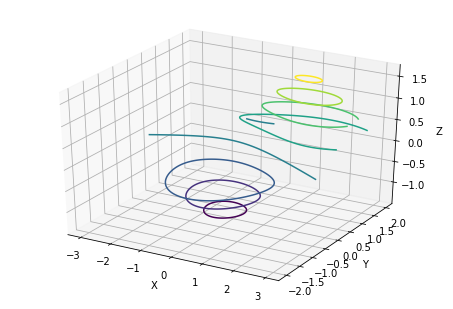

In [2]:
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.mlab import bivariate_normal
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0) #Distribución gaussiana bivariable
Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# diferencia de Gaussianos
Z = 10.0 * (Z2 - Z1)
fig=plt.figure()
ax = p3.Axes3D(fig)
ax.contour3D(X,Y,Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

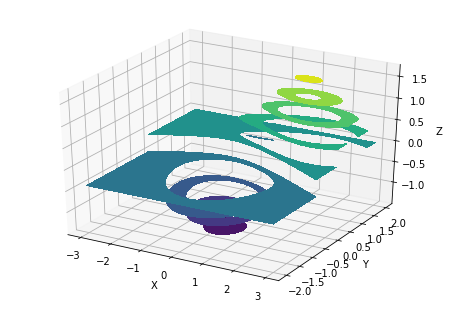

In [3]:
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.contourf3D(X,Y,Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.add_axes(ax)
plt.show()

/usr/lib64/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


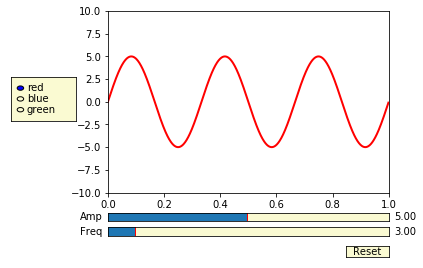

In [4]:
# Ejemplo de gráfico interactivo

from numpy import pi, sin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

def signal(amp, freq):
    return amp * sin(2 * pi * freq * t)

axis_color = 'lightgoldenrodyellow'
fig = plt.figure()

# Draw the plot
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
amp_0 = 5
freq_0 = 3
[line] = ax.plot(t, signal(amp_0, freq_0), linewidth=2, color='red')
ax.set_xlim([0, 1])
ax.set_ylim([-10, 10])

# Add two sliders for tweaking the parameters
amp_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], axisbg=axis_color)
amp_slider = Slider(amp_slider_ax, 'Amp', 0.1, 10.0, valinit=amp_0)
freq_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], axisbg=axis_color)
freq_slider = Slider(freq_slider_ax, 'Freq', 0.1, 30.0, valinit=freq_0)
def sliders_on_changed(val):
    line.set_ydata(signal(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
amp_slider.on_changed(sliders_on_changed)
freq_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    amp_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

# Add a set of radio buttons for changing color
color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], axisbg=axis_color)
color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
def color_radios_on_clicked(label):
    line.set_color(label)
    fig.canvas.draw_idle()
color_radios.on_clicked(color_radios_on_clicked)

plt.show()

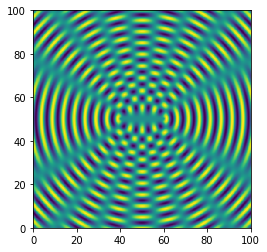

In [5]:
%matplotlib inline
from math import sqrt,sin,pi
from numpy import empty
from matplotlib.pyplot import imshow,gray,show
wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm
# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2
# Make an array to store the heights
xi = empty([points,points],float)
# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0*sin(k*r1) + xi0*sin(k*r2)
# Make the plot
imshow(xi,origin="lower",extent=[0,side,0,side])
show()

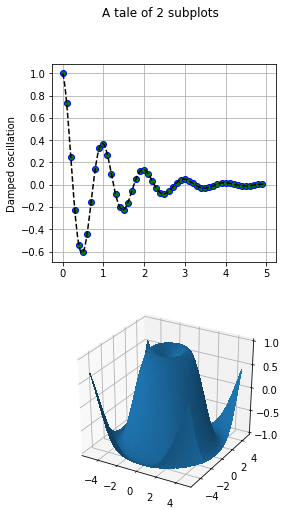

In [8]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return np.multiply(s1, e1)


################
# First subplot
################
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

# Twice as tall as it is wide.
fig = plt.figure(figsize=plt.figaspect(2.))
fig.suptitle('A tale of 2 subplots')
ax = fig.add_subplot(2, 1, 1)
l = ax.plot(t1, f(t1), 'bo',
            t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')


#################
# Second subplot
#################
ax = fig.add_subplot(2, 1, 2, projection='3d')
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)

ax.set_zlim3d(-1, 1)

plt.show()
